<a href="https://colab.research.google.com/github/mohamed7456/ML-Course-Assignments/blob/main/notebooks/03_svm_with_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM with Kernels**

## **Imports**

In [ ]:
!pip install ffmpeg-python

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

## **Data Loading**

In [ ]:
column_names = ['Feature 1', 'Feature 2', 'Label']

Aggregation_df = pd.read_csv('/content/Aggregation.txt', delimiter = '\t', skiprows = 7, header = None, names = column_names)
Compound_df = pd.read_csv('/content/Compound.txt', delimiter = '\t', skiprows = 7, header = None, names = column_names)
Flame_df = pd.read_csv('/content/Flame.txt', delimiter = '\t', skiprows = 7, header = None, names = column_names)
Jain_df = pd.read_csv('/content/Jain.txt', delimiter = '\t', skiprows = 7, header = None, names = column_names)
Pathbased_df = pd.read_csv('/content/Pathbased.txt', delimiter ='\t', skiprows = 7, header = None, names = column_names)
Spiral_df = pd.read_csv('/content/Spiral.txt', delimiter = '\t', skiprows = 7, header = None, names = column_names)

### **(1) Aggregation dataset**

In [ ]:
X_Agg = Aggregation_df[['Feature 1', 'Feature 2']].values
y_Agg = Aggregation_df['Label'].values

# split data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_Agg, y_Agg, test_size=0.2, random_state=42)

# training
classifier1 = SVC(C = 100, kernel = 'rbf', gamma = 0.5)
classifier1.fit(X_train1, y_train1)

# predict
Y_Agg_Pred = classifier1.predict(X_test1)

# accuracy
print(f'Accuracy = {metrics.accuracy_score(y_test1, Y_Agg_Pred)}')

Accuracy = 1.0


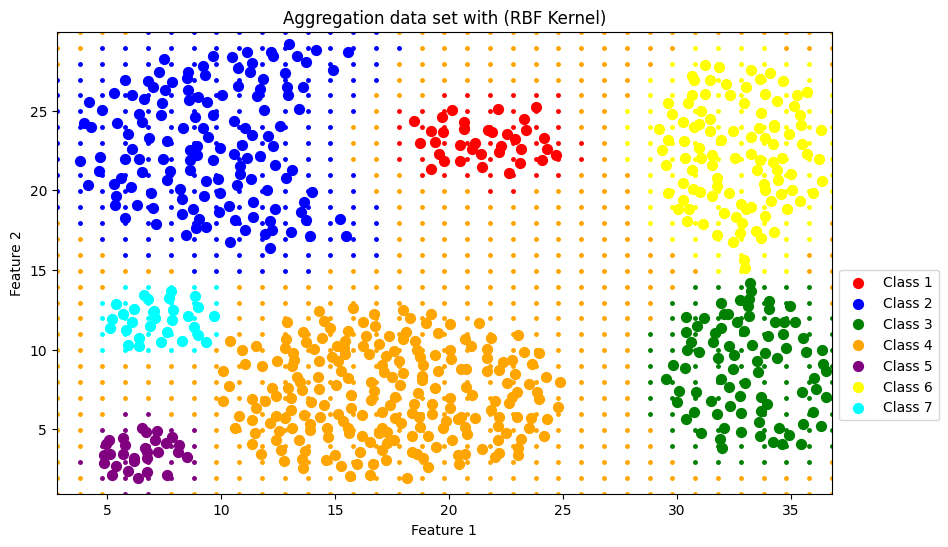

In [ ]:
x_min, x_max = X_train1[:, 0].min() - 1, X_train1[:, 0].max() + 1
y_min, y_max = X_train1[:, 1].min() - 1, X_train1[:, 1].max() + 1

step_size = 1
feature1_mesh, feature2_mesh = np.meshgrid(np.arange(x_min, x_max, step_size),
                                           np.arange(y_min, y_max, step_size))

feature1_flat = feature1_mesh.flatten()
feature2_flat = feature2_mesh.flatten()

mesh_grid = np.vstack((feature1_flat, feature2_flat)).T

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train1), colors)}

for idx, label in enumerate(np.unique(y_train1)):
    plt.scatter(X_train1[y_train1 == label, 0], X_train1[y_train1 == label, 1],
                c=color_map[label], label=f'Class {label}', s=50)

for i in range(feature1_mesh.shape[0]):
    for j in range(feature1_mesh.shape[1]):
        point = np.array([[feature1_mesh[i, j], feature2_mesh[i, j]]])
        prediction = classifier1.predict(point)
        plt.plot(feature1_mesh[i, j], feature2_mesh[i, j], marker='.', markersize=5,
                 c=color_map[prediction[0]])

plt.xlim(feature1_mesh.min(), feature1_mesh.max())
plt.ylim(feature2_mesh.min(), feature2_mesh.max())
plt.title("Aggregation data set with (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
x_min, x_max = X_train1[:, 0].min() - 1, X_train1[:, 0].max() + 1
y_min, y_max = X_train1[:, 1].min() - 1, X_train1[:, 1].max() + 1

step_size = 1

feature1_mesh, feature2_mesh = np.meshgrid(np.arange(x_min, x_max, step_size),
                                           np.arange(y_min, y_max, step_size))

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train1), colors)}

for idx, label in enumerate(np.unique(y_train1)):
    ax.scatter(X_train1[y_train1 == label, 0], X_train1[y_train1 == label, 1],
               c=color_map[label], label=f'Class {label}', s=100)


def update(frame):
    ax.clear()
    ax.set_xlim(feature1_mesh.min(), feature1_mesh.max())
    ax.set_ylim(feature2_mesh.min(), feature2_mesh.max())
    ax.set_title("SVM Classification Animation")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

    for idx, label in enumerate(np.unique(y_train1)):
        ax.scatter(X_train1[y_train1 == label, 0], X_train1[y_train1 == label, 1],
                   c=color_map[label], label=f'Class {label}', s=30)


    end_index = min(frame * 5, feature1_mesh.size)
    mesh_points = np.c_[feature1_mesh.ravel()[:end_index], feature2_mesh.ravel()[:end_index]]
    if len(mesh_points) > 0:
        predictions = classifier1.predict(mesh_points)
        ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=[color_map[p] for p in predictions], marker='.', alpha=0.3)

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


total_points = feature1_mesh.size
ani = FuncAnimation(fig, update, frames=range(total_points), interval=50, repeat=False)
ani.save('svm_classification.mp4', writer='ffmpeg')

plt.show()

In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())

### **(2) Compound dataset**

In [ ]:
X_Comp = Compound_df[['Feature 1', 'Feature 2']].values
y_Comp = Compound_df['Label'].values

# split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Comp, y_Comp, test_size=0.2, random_state=42)

# training
classifier2 = SVC(C = 4000, kernel = 'rbf')
classifier2.fit(X_train2, y_train2)

# predict
Y_Comp_Pred = classifier2.predict(X_test2)

# accuracy
print(f'Accuracy = {metrics.accuracy_score(y_test2, Y_Comp_Pred)}')

Accuracy = 0.9875


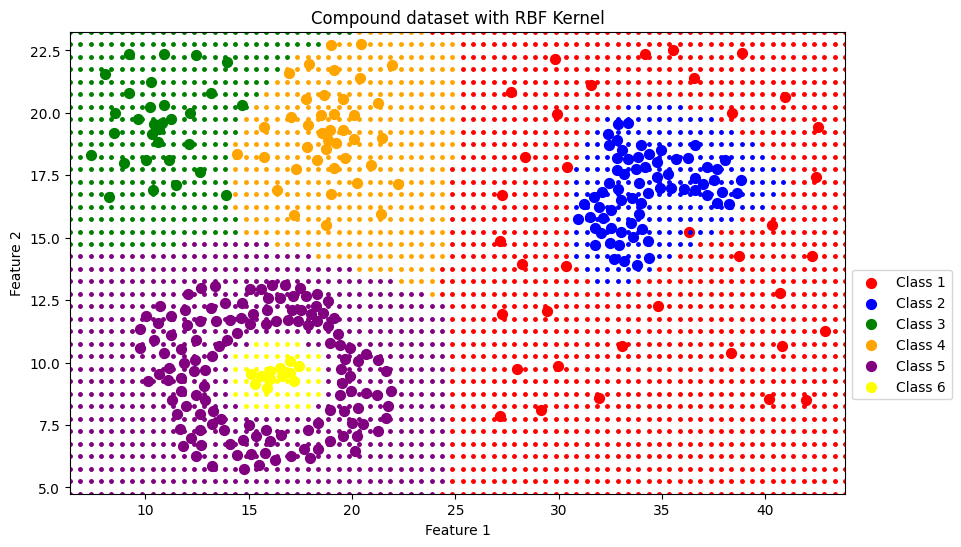

In [ ]:
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1


step_size = 0.5
feature1_mesh, feature2_mesh = np.meshgrid(np.arange(x_min, x_max, step_size),
                                           np.arange(y_min, y_max, step_size))

feature1_flat = feature1_mesh.flatten()
feature2_flat = feature2_mesh.flatten()

mesh_grid = np.vstack((feature1_flat, feature2_flat)).T

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train2), colors)}

for idx, label in enumerate(np.unique(y_train2)):
    plt.scatter(X_train2[y_train2 == label, 0], X_train2[y_train2 == label, 1],
                c=color_map[label], label=f'Class {label}', s=50)

for i in range(feature1_mesh.shape[0]):
    for j in range(feature1_mesh.shape[1]):
        point = np.array([[feature1_mesh[i, j], feature2_mesh[i, j]]])
        prediction = classifier2.predict(point)
        plt.plot(feature1_mesh[i, j], feature2_mesh[i, j], marker='.', markersize=5,
                 c=color_map[prediction[0]])

plt.xlim(feature1_mesh.min(), feature1_mesh.max())
plt.ylim(feature2_mesh.min(), feature2_mesh.max())
plt.title("Compound dataset with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

### **(3) Flame dataset**

In [ ]:
X_Flame = Flame_df[['Feature 1', 'Feature 2']].values
y_Flame = Flame_df['Label'].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_Flame, y_Flame, test_size=0.2, random_state=42)


classifier3 = SVC(C = 4000, kernel = 'poly')
classifier3.fit(X_train3, y_train3)

Y_Flame_Pred = classifier3.predict(X_test3)

print(f'Accuracy = {metrics.accuracy_score(y_test3, Y_Flame_Pred)}')

Accuracy = 1.0


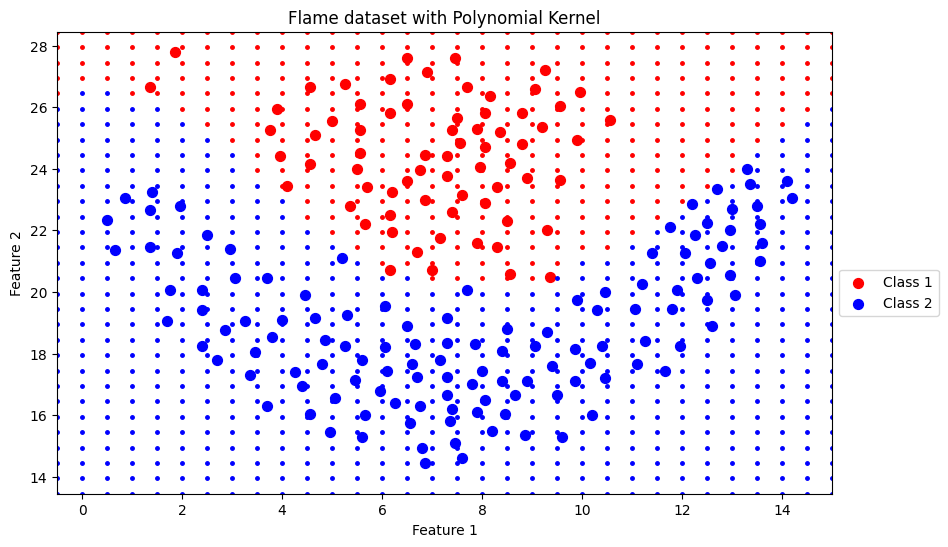

In [ ]:
x_min, x_max = X_train3[:, 0].min() - 1, X_train3[:, 0].max() + 1
y_min, y_max = X_train3[:, 1].min() - 1, X_train3[:, 1].max() + 1

step_size = 0.5
feature1_mesh, feature2_mesh = np.meshgrid(np.arange(x_min, x_max, step_size),
                                           np.arange(y_min, y_max, step_size))

feature1_flat = feature1_mesh.flatten()
feature2_flat = feature2_mesh.flatten()

mesh_grid = np.vstack((feature1_flat, feature2_flat)).T

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train3), colors)}

for idx, label in enumerate(np.unique(y_train3)):
    plt.scatter(X_train3[y_train3 == label, 0], X_train3[y_train3 == label, 1],
                c=color_map[label], label=f'Class {label}', s=50)

for i in range(feature1_mesh.shape[0]):
    for j in range(feature1_mesh.shape[1]):
        point = np.array([[feature1_mesh[i, j], feature2_mesh[i, j]]])
        prediction = classifier3.predict(point)
        plt.plot(feature1_mesh[i, j], feature2_mesh[i, j], marker='.', markersize=5,
                 c=color_map[prediction[0]])

plt.xlim(feature1_mesh.min(), feature1_mesh.max())
plt.ylim(feature2_mesh.min(), feature2_mesh.max())
plt.title("Flame dataset with Polynomial Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

### **(4) Jain dataset**

In [ ]:
X_Jain = Jain_df[['Feature 1', 'Feature 2']].values
y_Jain = Jain_df['Label'].values

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_Jain, y_Jain, test_size=0.2, random_state=42)


classifier4 = SVC(C = 2500, kernel = 'poly')
classifier4.fit(X_train4, y_train4)

Y_Jain_Pred = classifier4.predict(X_test4)

print(f'Accuracy = {metrics.accuracy_score(y_test4, Y_Jain_Pred)}')

Accuracy = 1.0


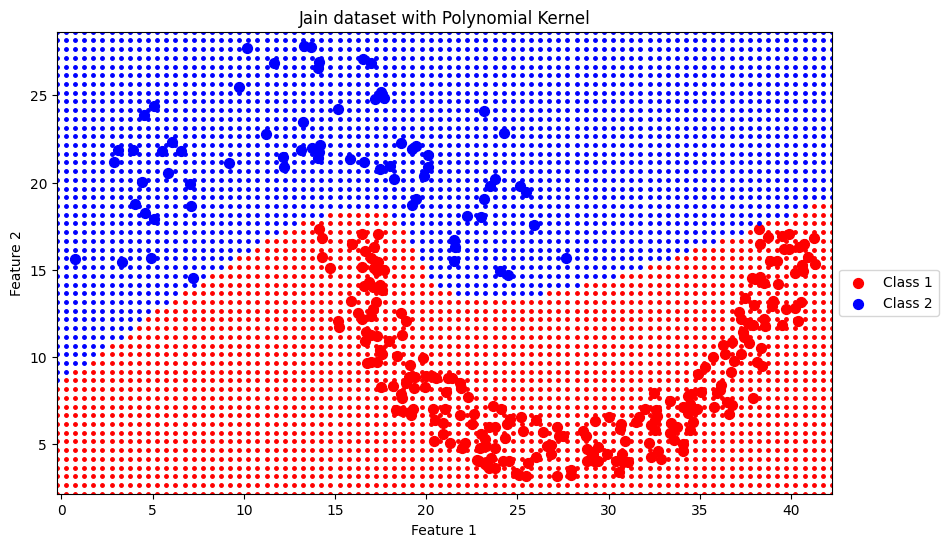

In [ ]:
x_min, x_max = X_train4[:, 0].min() - 1, X_train4[:, 0].max() + 1
y_min, y_max = X_train4[:, 1].min() - 1, X_train4[:, 1].max() + 1

step_size = 0.5
feature1_mesh, feature2_mesh = np.meshgrid(np.arange(x_min, x_max, step_size),
                                           np.arange(y_min, y_max, step_size))

feature1_flat = feature1_mesh.flatten()
feature2_flat = feature2_mesh.flatten()

mesh_grid = np.vstack((feature1_flat, feature2_flat)).T

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train4), colors)}

for idx, label in enumerate(np.unique(y_train4)):
    plt.scatter(X_train4[y_train4 == label, 0], X_train4[y_train4 == label, 1],
                c=color_map[label], label=f'Class {label}', s=50)

for i in range(feature1_mesh.shape[0]):
    for j in range(feature1_mesh.shape[1]):
        point = np.array([[feature1_mesh[i, j], feature2_mesh[i, j]]])
        prediction = classifier4.predict(point)
        plt.plot(feature1_mesh[i, j], feature2_mesh[i, j], marker='.', markersize=5,
                 c=color_map[prediction[0]])

plt.xlim(feature1_mesh.min(), feature1_mesh.max())
plt.ylim(feature2_mesh.min(), feature2_mesh.max())
plt.title("Jain dataset with Polynomial Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

### **(5) Pathbased dataset**

In [ ]:
X_Pathbased = Pathbased_df[['Feature 1', 'Feature 2']].values
y_Pathbased = Pathbased_df['Label'].values

# split data
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_Pathbased, y_Pathbased, test_size=0.2, random_state=42)

# training
classifier5 = SVC(C = 2, kernel = 'rbf')
classifier5.fit(X_train5, y_train5)

# predict
Y_Pathbased_Pred = classifier5.predict(X_test5)

# accuracy
print(f'Accuracy = {metrics.accuracy_score(y_test5, Y_Pathbased_Pred)}')

Accuracy = 0.9833333333333333


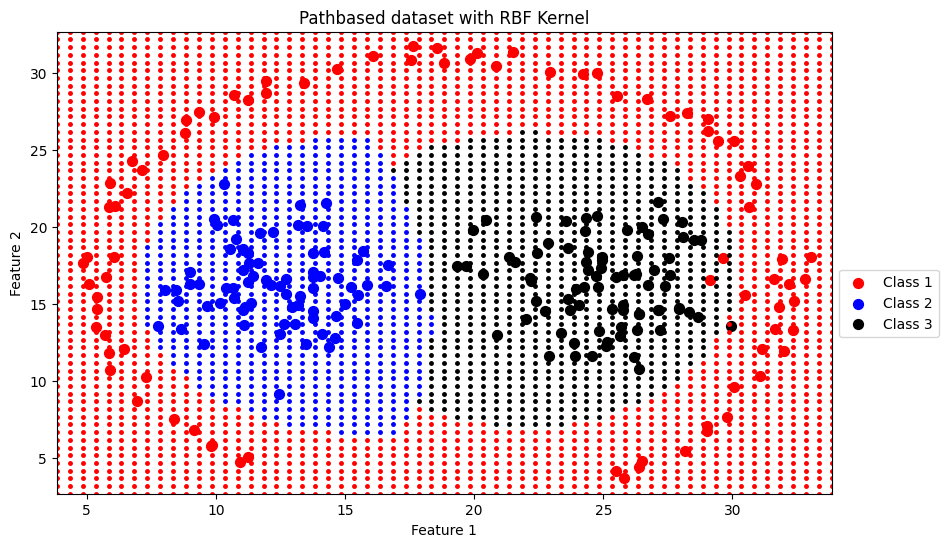

In [ ]:
x_min, x_max = X_train5[:, 0].min() - 1, X_train5[:, 0].max() + 1
y_min, y_max = X_train5[:, 1].min() - 1, X_train5[:, 1].max() + 1


step_size = 0.5
feature1_mesh, feature2_mesh = np.meshgrid(np.arange(x_min, x_max, step_size),
                                           np.arange(y_min, y_max, step_size))

feature1_flat = feature1_mesh.flatten()
feature2_flat = feature2_mesh.flatten()

mesh_grid = np.vstack((feature1_flat, feature2_flat)).T

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'black', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'green']
color_map = {label: color for label, color in zip(np.unique(y_train5), colors)}

for idx, label in enumerate(np.unique(y_train5)):
    plt.scatter(X_train5[y_train5 == label, 0], X_train5[y_train5 == label, 1],
                c=color_map[label], label=f'Class {label}', s=50)

for i in range(feature1_mesh.shape[0]):
    for j in range(feature1_mesh.shape[1]):
        point = np.array([[feature1_mesh[i, j], feature2_mesh[i, j]]])
        prediction = classifier5.predict(point)
        plt.plot(feature1_mesh[i, j], feature2_mesh[i, j], marker='.', markersize=5,
                 c=color_map[prediction[0]])

plt.xlim(feature1_mesh.min(), feature1_mesh.max())
plt.ylim(feature2_mesh.min(), feature2_mesh.max())
plt.title("Pathbased dataset with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

### **(6) Spiral dataset**

In [ ]:
X_Spiral = Spiral_df[['Feature 1', 'Feature 2']].values
y_Spiral = Spiral_df['Label'].values

# split data
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_Spiral, y_Spiral, test_size=0.2, random_state=42)

# training
classifier6 = SVC(C = 2000, kernel = 'rbf')
classifier6.fit(X_train6, y_train6)

# predict
Y_Spiral_Pred = classifier6.predict(X_test6)

# accuracy
print(f'Accuracy = {metrics.accuracy_score(y_test6, Y_Spiral_Pred)}')

Accuracy = 1.0


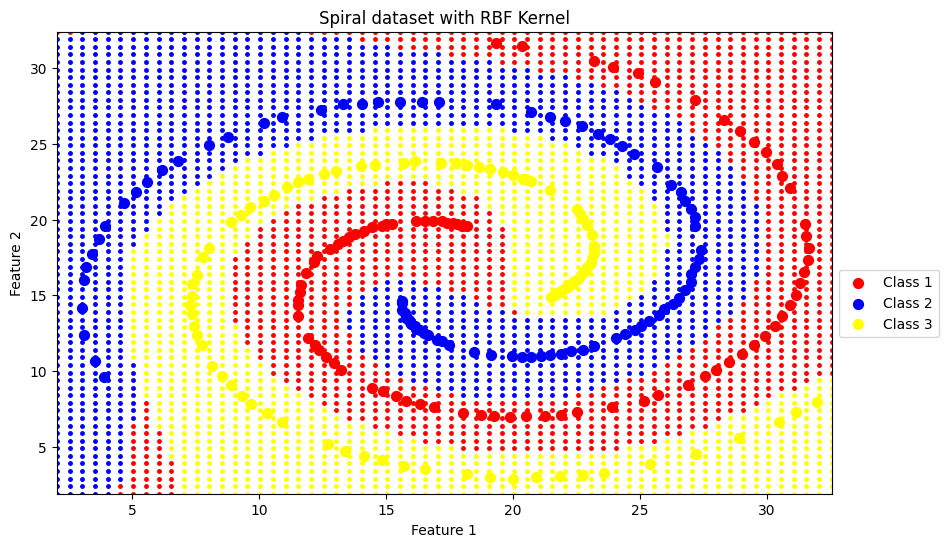

In [ ]:
x_min, x_max = X_train6[:, 0].min() - 1, X_train6[:, 0].max() + 1
y_min, y_max = X_train6[:, 1].min() - 1, X_train6[:, 1].max() + 1


step_size = 0.5
feature1_mesh, feature2_mesh = np.meshgrid(np.arange(x_min, x_max, step_size),
                                           np.arange(y_min, y_max, step_size))

feature1_flat = feature1_mesh.flatten()
feature2_flat = feature2_mesh.flatten()

mesh_grid = np.vstack((feature1_flat, feature2_flat)).T

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'yellow', 'orange', 'purple', 'green', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train6), colors)}

for idx, label in enumerate(np.unique(y_train6)):
    plt.scatter(X_train6[y_train6 == label, 0], X_train6[y_train6 == label, 1],
                c=color_map[label], label=f'Class {label}', s=50)

for i in range(feature1_mesh.shape[0]):
    for j in range(feature1_mesh.shape[1]):
        point = np.array([[feature1_mesh[i, j], feature2_mesh[i, j]]])
        prediction = classifier6.predict(point)
        plt.plot(feature1_mesh[i, j], feature2_mesh[i, j], marker='.', markersize=5,
                 c=color_map[prediction[0]])

plt.xlim(feature1_mesh.min(), feature1_mesh.max())
plt.ylim(feature2_mesh.min(), feature2_mesh.max())
plt.title("Spiral dataset with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()